# UUV Environment Demo

In [1]:
from fimdpenv import setup, UUVEnv
setup()

## Single Agent Environment

In [6]:
from UUVEnv import SingleAgentEnv

### Regular Action Space

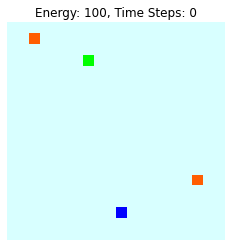

In [29]:
# create envionment
env = SingleAgentEnv(grid_size=[20,20], capacity=100, reload=[22,297], target=[67], init_state=350, enhanced_actionspace=0)
env.create_consmdp
env

In [30]:
# create consmdp
env.create_consmdp()
mdp, targets = env.get_consmdp()

In [31]:
# create strategy and animate
import fimdp
from fimdp.energy_solver import GoalLeaningES
solver = GoalLeaningES(mdp, env.capacity, targets, threshold=0.1)
strategy = solver.get_strategy(fimdp.energy_solver.BUCHI)
env.update_strategy(strategy)
env.animate_strategy(num_steps=50, interval=100)

In [20]:
# human readable action labels
strategy[135]

{25: 'Weak North', 24: 'Weak North', 20: 'Strong North', 19: 'Strong West'}

### Enchanced Action Space

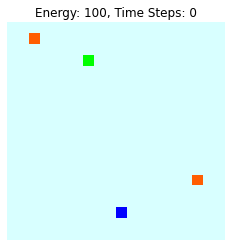

In [21]:
# create envionment
env = SingleAgentEnv(grid_size=[20,20], capacity=100, reload=[22,297], target=[67], init_state=350, enhanced_actionspace=1)
env.create_consmdp
env

In [22]:
# create consmdp
env.create_consmdp()
mdp, targets = env.get_consmdp()

In [27]:
# create strategy and animate
import fimdp
from fimdp.energy_solver import GoalLeaningES
solver = GoalLeaningES(mdp, env.capacity, targets, threshold=0.1)
strategy = solver.get_strategy(fimdp.energy_solver.BUCHI)
env.update_strategy(strategy)
env.animate_strategy(num_steps=50, interval=100)

In [26]:
# human readable action labels
strategy[135]

{19: 'Weak North-West', 18: 'Weak North', 13: 'Strong South-East'}

## Multi-Agent Environment

In [2]:
from UUVEnv import SynchronousMultiAgentEnv

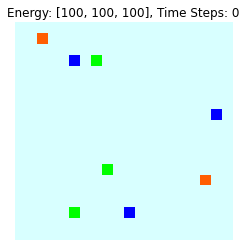

In [25]:
# create envionment
num_agents = 3
env = SynchronousMultiAgentEnv(num_agents=3, grid_size=[20,20], capacity=[100,100,100], reload=[22,297], target=[67, 345, 268], init_state=[350, 178, 65], enhanced_actionspace=0)
env.create_consmdp
env

In [26]:
# create consmdp
env.create_consmdp()
mdp, targets = env.get_consmdp()

In [27]:
# allocate targets
allocation_list = [[67], [268], [345]]
env.allocate_target(allocation_list)

In [35]:
# generate strategies and animate
import fimdp
from fimdp.energy_solver import GoalLeaningES
for agent_id in range(env.num_agents):
    solver = GoalLeaningES(mdp, env.capacity[agent_id], env.target_allocation[agent_id], threshold=0.1)
    strategy = solver.get_strategy(fimdp.energy_solver.BUCHI)
    env.update_strategy(agent_id, strategy)
env.animate_strategy(num_steps=50, interval=100)